In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, spearmanr, wilcoxon
import plotly.express as px
import plotly.graph_objects as go
import nbformat

from scipy.stats import ttest_ind, f_oneway
import statsmodels.api as sm
import statsmodels.formula.api as smf
from matplotlib_venn import venn2
import os
import scipy.cluster.hierarchy as sch

In [33]:
target_CAF=["FAP","PDGFRA","PDGFRB","S100A4","LRRC15","IL1R1","IL1R2"]


cafs_factors_receptors=  ["TGFB1","TGFB2","TGFB3", "TGFBR1","TGFBR2","TGFBR3","IL6", "IL6R", "IL10RA","IL10RB", "CXCL8", "CXCL12", 
 "CCR5", "CXCR2", "CXCR1", "CXCR4", "CXCL10","CXCL9","HGF", "MET", 
 "FGF1","FGF2","FGF7","FGF10", "FGFR1","FGFR2","FGFR3","FGFR4"]




genes_of_interest = ['FGFR2', 'IL6R', 'CCR5', 'HGF', 'IL10RB',
       'TGFB1', 'TGFBR2', 'CCR2', 'MET', 'LRRC15', 'IL1R1', 'CXCR2', 'IL10RA',
       'CXCL10', 'FGF2', 'FGF7', 'FGFR4', 'IL6ST', 'CXCL9', 'PDGFRB', 'S100A4',
       'TGFB2', 'TGFB3', 'TGFBR3', 'CXCR4', 'FAP', 'TGFBR1', 'PDGFRA', 'FGFR1',
       'FGFR3', 'FGF1', 'IL1R2', 'CXCL12', 'CXCL8', 'IL6', 'CXCR1', 'FGF10']

In [3]:
fibroblasts_gene_expression=pd.read_csv("/Users/nikamikhailava/Desktop/batch_merged/fibroblasts_specific_expression_batch12.csv")
geomx_metadata_modified = pd.read_csv("/Users/nikamikhailava/Desktop/batch_merged/batch_merged_geomx_metadata.csv")     


In [4]:
fibroblasts_gene_expression_T = fibroblasts_gene_expression.transpose()
fibroblasts_gene_expression_T

,0,1,2,3,4,5,6,7,8,9,...,14637,14638,14639,14640,14641,14642,14643,14644,14645,14646
Unnamed: 0,SAMD11,NOC2L,KLHL17,PLEKHN1,PERM1,HES4,ISG15,AGRN,RNF223,C1orf159,...,TYMP,ODF3B,KLHDC7B,SYCE3,CPT1B,CHKB,MAPK8IP2,ARSA,ACR,RABL2B
DSP-1001660016604-A-A02.dcc,1.718431,2.137428,1.836881,1.997698,0.161226,2.480789,4.36481,2.270061,0.033787,2.008302,...,3.518439,2.604125,2.17716,0.11225,-0.133762,2.732942,2.097976,1.991563,-0.115321,2.171023
DSP-1001660016604-A-A04.dcc,1.6221,2.027326,1.737519,1.901971,0.158211,2.375319,5.534481,2.16377,0.033655,1.910645,...,3.753967,2.480825,-0.339969,0.110335,-0.132474,2.612235,2.000658,2.63368,-0.11439,2.073686
DSP-1001660016604-A-A05.dcc,1.427961,1.505719,1.830641,1.348903,0.165076,2.201253,5.497989,2.271254,0.033957,1.362068,...,3.021726,2.07823,1.527292,0.114697,1.234495,2.203807,1.45118,2.419147,1.253395,1.018083
DSP-1001660016604-A-A07.dcc,1.353614,1.787912,1.868598,1.631783,0.164922,2.126467,6.245903,2.308907,0.03395,1.644846,...,3.065524,2.187913,1.242569,0.114599,1.455652,2.31362,1.166335,2.975583,1.474534,1.23925
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
DSP-1001660037247-C-D01.dcc,1.808434,1.844244,1.772121,1.524628,-0.121914,1.967129,3.434814,2.026795,0.028477,1.795408,...,2.556231,2.744814,-0.136998,-0.061764,-0.042233,2.875966,1.65513,2.464421,-0.306182,1.698925
DSP-1001660037247-C-D02.dcc,1.399579,1.726509,1.367213,1.114765,0.917727,2.449179,6.042179,2.140981,0.028518,1.388926,...,4.02564,2.583275,1.305834,-0.063915,-0.043223,2.450475,0.842811,2.150309,0.731006,1.291812
DSP-1001660037247-C-D03.dcc,0.084584,0.16445,-0.030218,-0.168501,-0.042646,0.429389,7.393944,0.414974,0.028022,0.003962,...,3.340172,0.117104,-0.046029,-0.013366,-0.006516,0.253744,-0.073099,0.116914,-0.150866,-0.062654
DSP-1001660037247-C-D04.dcc,1.367126,1.920226,1.332952,-0.329163,-0.1238,2.040032,4.567637,2.101017,0.028499,1.355422,...,3.686928,2.409028,-0.138851,-0.06294,-0.042798,2.538877,1.213638,1.90964,1.102473,1.258566


In [5]:
fibroblasts_gene_expression_T_reset = fibroblasts_gene_expression_T.reset_index()

# Optionally, rename the new column (if you didn't already rename the index)
fibroblasts_gene_expression_T_reset.rename(columns={'index': 'dcc_filename'}, inplace=True)

fibroblasts_gene_expression_T_reset.iloc[0, 0]='dcc_filename'
# Now 'dcc_filename' is a regular column, not the index

fibroblasts_gene_expression_T_reset.columns = fibroblasts_gene_expression_T_reset.iloc[0]


# Drop the first row
fibroblasts_gene_expression_T_reset = fibroblasts_gene_expression_T_reset.drop(index=fibroblasts_gene_expression_T_reset.index[0])
len(fibroblasts_gene_expression_T_reset)

423

In [36]:
clinical_subset

,dcc_filename,Sample,PFS_quartile,OS_quartile,BRCA_status,HRP_status,Segment
0,DSP.1001660016606.G.A02.dcc,S053_post,1,1,0.0,1.0,stroma
1,DSP.1001660016606.G.A03.dcc,S053_post,1,1,0.0,1.0,tumor
2,DSP.1001660016606.G.A04.dcc,S053_post,1,1,0.0,1.0,stroma
3,DSP.1001660016606.G.A05.dcc,S053_post,1,1,0.0,1.0,tumor
4,DSP.1001660016606.G.A06.dcc,S053_post,1,1,0.0,1.0,stroma
...,...,...,...,...,...,...,...
499,DSP.1001660037247.C.D02.dcc,S333_pOme,3,1,0.0,1.0,stroma
500,DSP.1001660037247.C.D03.dcc,S333_pOme,3,1,0.0,1.0,tumor
501,DSP.1001660037247.C.D04.dcc,S333_pOme,3,1,0.0,1.0,stroma
502,DSP.1001660037247.C.D05.dcc,S333_pOme,3,1,0.0,1.0,tumor


In [6]:
clinical_subset = geomx_metadata_modified[["dcc_filename","Sample", "PFS_quartile", "OS_quartile", "BRCA_status", "HRP_status","Segment"]]
#clinical_subset['dcc_filename'] = clinical_subset['dcc_filename'].str.replace('-', '.', regex=False)

#clinical_subset = clinical_subset.drop_duplicates(subset="Sample")
# Merge on the 'Sample' column
#merged_df = pd.merge(geomx_metadata, clinical_subset, on="Sample", how="left")

# Save the result
#merged_df.to_csv("geomx_with_clinical.csv", index=False)
#clinical_subset
fibr_gene_expression_modified = pd.merge(fibroblasts_gene_expression_T_reset, clinical_subset, on="dcc_filename", how="left")
fibr_gene_expression_modified.to_csv("/Users/nikamikhailava/Desktop/batch_merged/filtered_fibroblasts_gene_exp_transposed_w_clinical.csv", index=False)
fibr_gene_expression_modified.head(5)


,dcc_filename,SAMD11,NOC2L,KLHL17,PLEKHN1,PERM1,HES4,ISG15,AGRN,RNF223,...,MAPK8IP2,ARSA,ACR,RABL2B,Sample,PFS_quartile,OS_quartile,BRCA_status,HRP_status,Segment
0,DSP-1001660016604-A-A02.dcc,1.718431,2.137428,1.836881,1.997698,0.161226,2.480789,4.36481,2.270061,0.033787,...,2.097976,1.991563,-0.115321,2.171023,S130_iOme,1,1,0.0,1.0,stroma
1,DSP-1001660016604-A-A04.dcc,1.6221,2.027326,1.737519,1.901971,0.158211,2.375319,5.534481,2.16377,0.033655,...,2.000658,2.63368,-0.11439,2.073686,S130_iOme,1,1,0.0,1.0,stroma
2,DSP-1001660016604-A-A05.dcc,1.427961,1.505719,1.830641,1.348903,0.165076,2.201253,5.497989,2.271254,0.033957,...,1.45118,2.419147,1.253395,1.018083,S130_iOme,1,1,0.0,1.0,tumor
3,DSP-1001660016604-A-A07.dcc,1.353614,1.787912,1.868598,1.631783,0.164922,2.126467,6.245903,2.308907,0.03395,...,1.166335,2.975583,1.474534,1.23925,S130_iOme,1,1,0.0,1.0,tumor
4,DSP-1001660016604-A-A08.dcc,1.829375,1.602863,1.291572,1.448092,0.164608,1.941802,3.83659,1.731314,0.033936,...,1.550127,2.550633,1.858295,1.623058,S130_iOme,1,1,0.0,1.0,stroma


In [7]:

fibroblast_expr_matrix = fibr_gene_expression_modified.loc[:,target_CAF]
fibroblast_expr_matrix


,FAP,PDGFRA,PDGFRB,S100A4,LRRC15,IL1R1,IL1R2
0,4.477101,4.253032,4.490853,2.415133,4.75183,4.693057,2.047388
1,4.647524,4.121889,4.177375,2.312471,4.39002,4.355143,-0.474031
2,4.587877,3.934733,4.036882,1.774473,4.837331,4.985381,1.760401
3,4.727329,4.293126,4.284694,1.489381,4.786474,4.969788,1.685913
4,4.787422,5.16444,4.250685,2.532246,4.951223,3.727657,1.501848
...,...,...,...,...,...,...,...
418,4.430975,5.049206,5.237696,2.29375,3.807648,3.956125,-0.248409
419,4.250933,3.936788,4.350719,2.585123,4.205551,3.557276,0.794677
420,4.072406,4.102395,3.209018,2.481203,3.793376,4.278922,-0.212283
421,4.10577,4.486863,3.485623,2.399692,4.178125,3.419354,1.163446


In [51]:
stroma_fibr_expr_matrix=fibr_gene_expression_modified.loc[fibr_gene_expression_modified["Segment"]=="stroma"]
stroma_fibr_expr_matrix=stroma_fibr_expr_matrix.loc[:,target_CAF]
# Ensure all values are floats (if they're not already)
stroma_fibr_expr_matrix = stroma_fibr_expr_matrix.values
stroma_fibr_expr_matrix=np.array(stroma_fibr_expr_matrix)
stroma_fibr_expr_matrix= stroma_fibr_expr_matrix.astype(float)

In [52]:
# Compute the distance matrix for genes and samples
stroma_sample_dist = sch.distance.pdist(stroma_fibr_expr_matrix,metric='euclidean')
stroma_gene_dist = sch.distance.pdist(stroma_fibr_expr_matrix.T, metric='euclidean')

# Perform hierarchical clustering (using complete linkage)
stroma_sample_linkage = sch.linkage(stroma_sample_dist, method='ward')
stroma_gene_linkage = sch.linkage(stroma_gene_dist, method='ward')

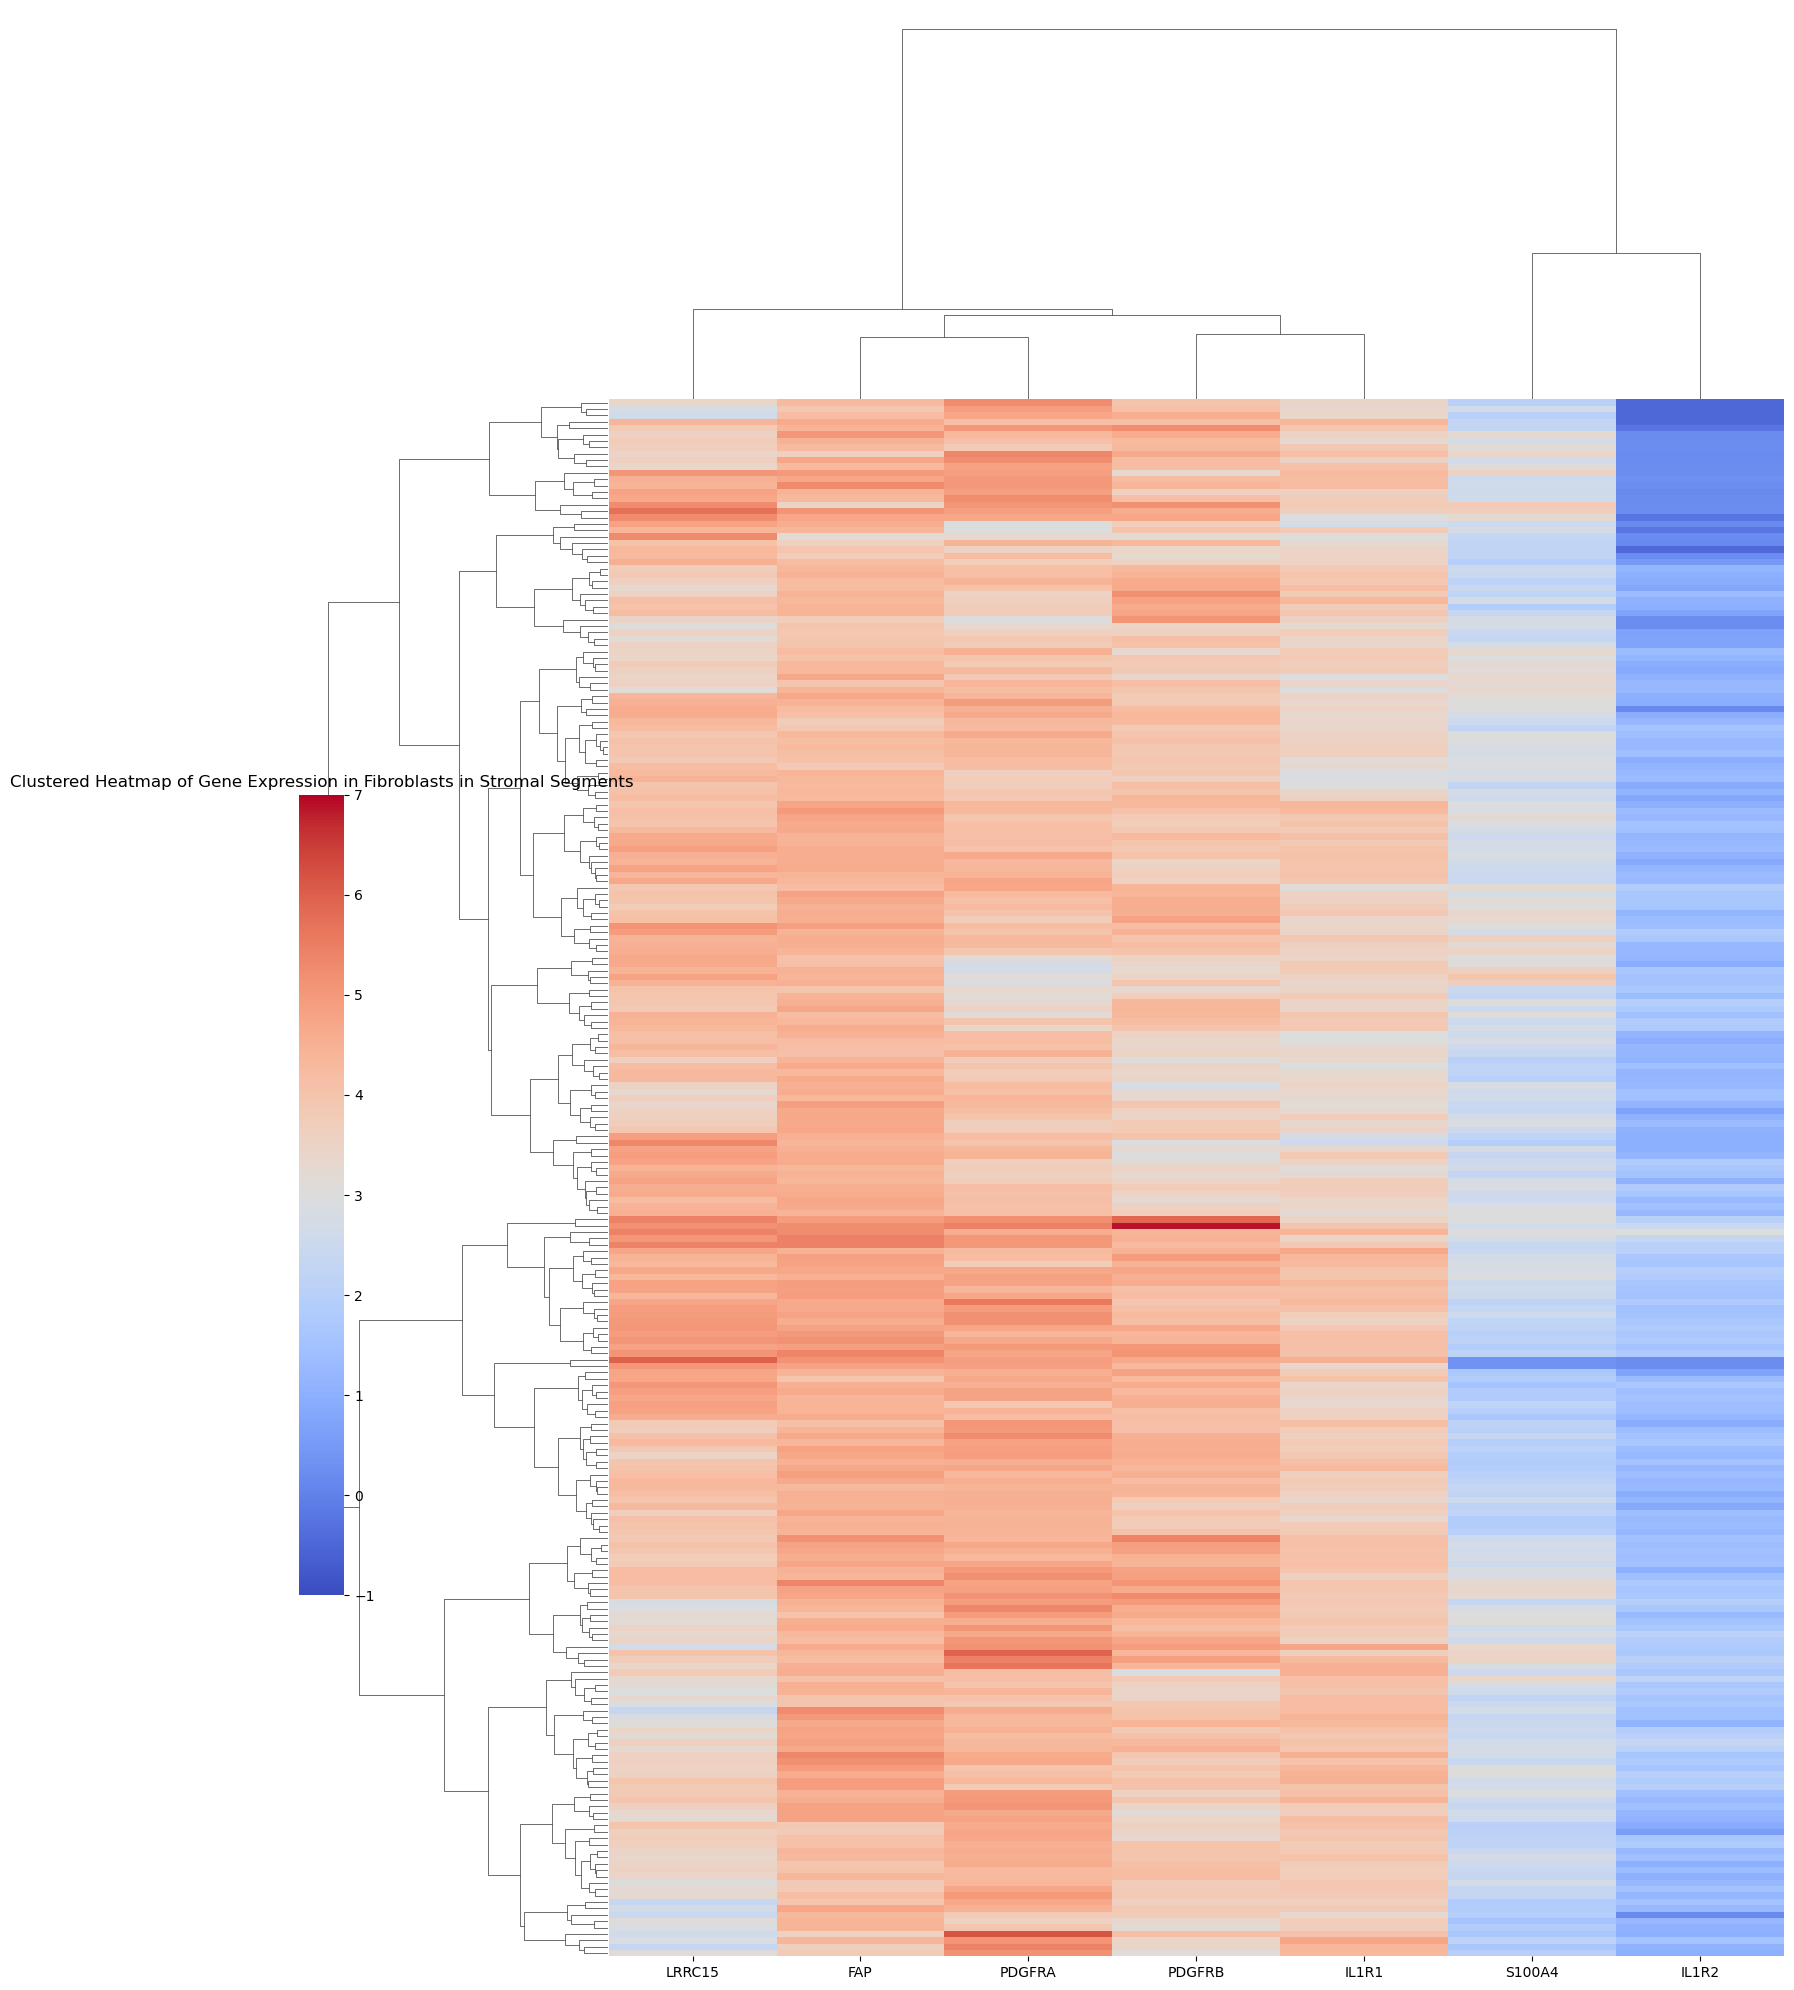

In [53]:
sns.clustermap(
    stroma_fibr_expr_matrix,  # The expression matrix (samples as rows, genes as columns)
    row_linkage=stroma_sample_linkage, 
    col_linkage=stroma_gene_linkage,  # Clustering of samples,  # Clustering of genes
    cmap='coolwarm',  # Color map for heatmap
    figsize=(15, 20),  # Size of the plot
    xticklabels=target_CAF,  # Show gene names as labels on the x-axis
    yticklabels=False,  # Show sample names as labels on the y-axis
    cbar_pos=(0, .2, .03, .4),  # Color bar position adjustments
    vmin=-1,
    vmax=7  # Set to True if you want to annotate each cell with the actual expression value
)

# Display the heatmap
plt.title("Clustered Heatmap of Gene Expression in Fibroblasts in Stromal Segments")
plt.show()

In [13]:
numeric_fibr_expr_matrix = fibroblast_expr_matrix.values
numeric_fibr_expr_matrix=np.array(numeric_fibr_expr_matrix)
print(len(numeric_fibr_expr_matrix))

423


In [92]:
numeric_fibr_expr_matrix=np.array(fibroblast_expr_matrix)

In [14]:
# Ensure all values are floats (if they're not already)
numeric_fibr_expr_matrix = numeric_fibr_expr_matrix.astype(float)


In [109]:
#sch.distance.euclidean(numeric_fibr_expr_matrix[0],numeric_fibr_expr_matrix[1])
numeric_fibr_expr_matrix

array([[ 4.47710129,  4.25303243,  4.49085261, ...,  4.75183023,
         4.69305697,  2.04738777],
       [ 4.64752387,  4.12188945,  4.17737493, ...,  4.39002041,
         4.35514335, -0.47403121],
       [ 4.58787726,  3.93473321,  4.03688167, ...,  4.83733119,
         4.98538085,  1.76040081],
       ...,
       [ 4.07240585,  4.10239452,  3.20901816, ...,  3.79337643,
         4.27892158, -0.21228296],
       [ 4.1057704 ,  4.48686282,  3.48562277, ...,  4.17812506,
         3.41935373,  1.16344643],
       [ 4.56395084,  4.97203896,  4.01028681, ...,  4.00548819,
         4.43932343,  1.25421561]])

In [49]:
# Compute the distance matrix for genes and samples
sample_dist = sch.distance.pdist(numeric_fibr_expr_matrix,metric='euclidean')
gene_dist = sch.distance.pdist(numeric_fibr_expr_matrix.T, metric='euclidean')

# Perform hierarchical clustering (using complete linkage)
sample_linkage = sch.linkage(sample_dist, method='ward')
gene_linkage = sch.linkage(gene_dist, method='ward')

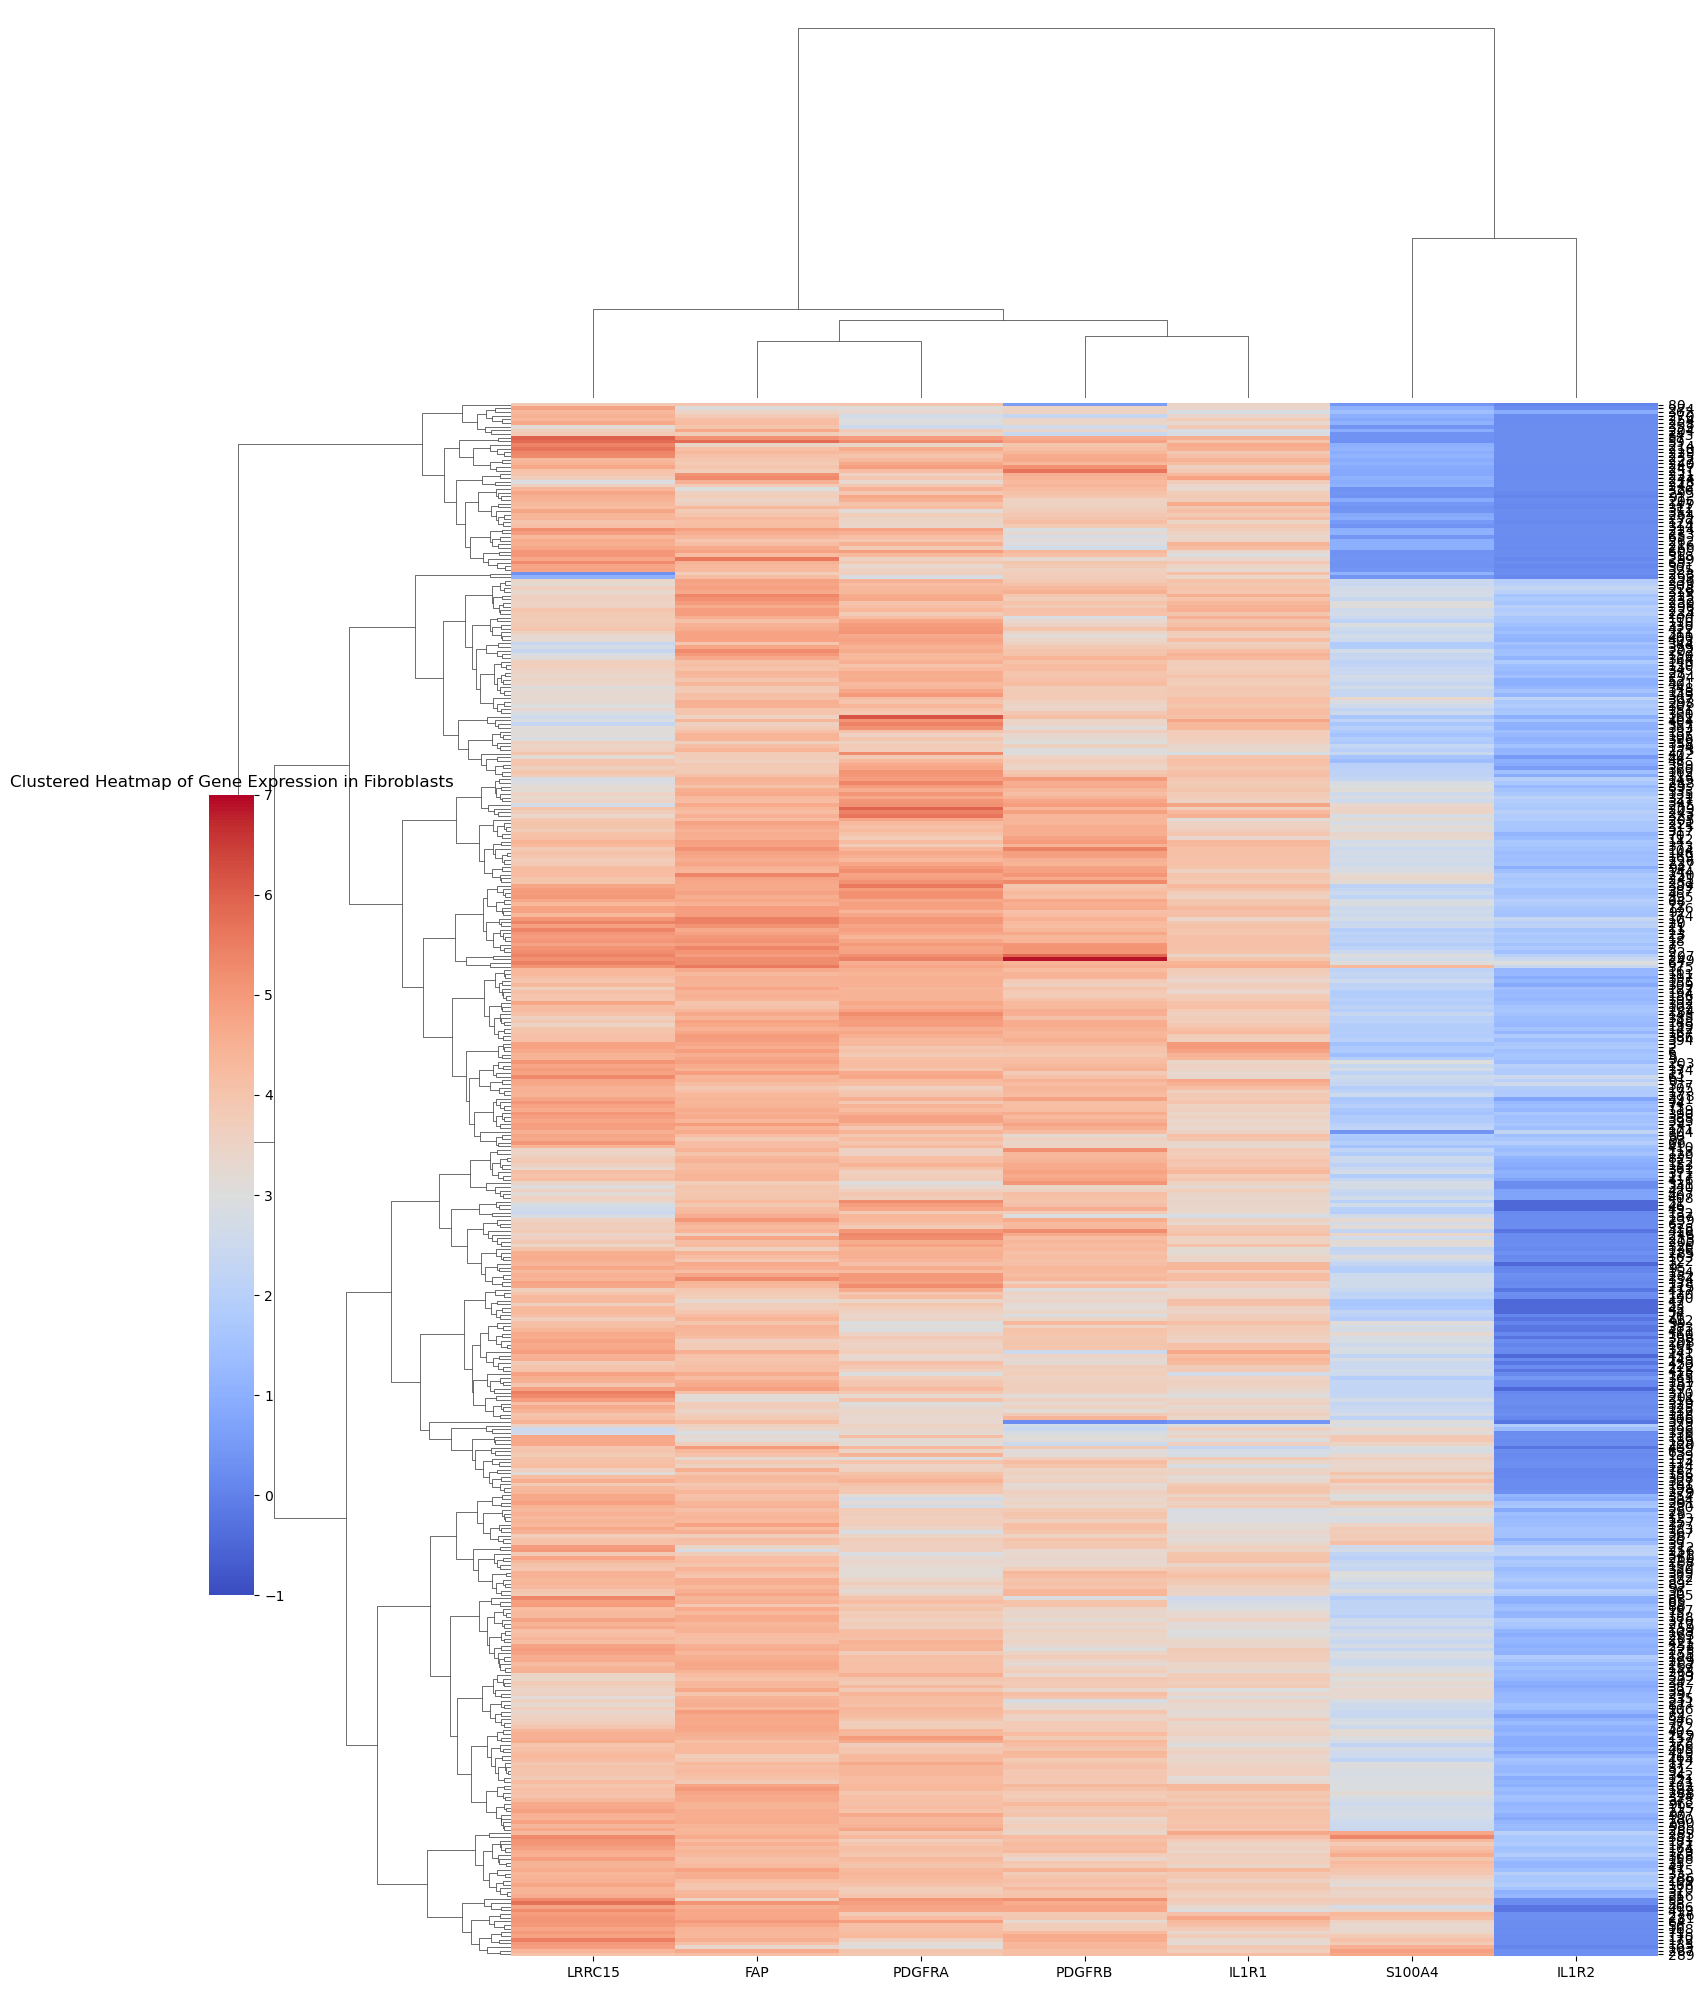

In [50]:
sns.clustermap(
    numeric_fibr_expr_matrix,  # The expression matrix (samples as rows, genes as columns)
    row_linkage=sample_linkage, 
    col_linkage=gene_linkage,  # Clustering of samples,  # Clustering of genes
    cmap='coolwarm',  # Color map for heatmap
     figsize=(15, 20),  # Size of the plot
    xticklabels=target_CAF,  # Show gene names as labels on the x-axis
    yticklabels=True,  # Show sample names as labels on the y-axis
    cbar_pos=(0, .2, .03, .4),  # Color bar position adjustments
    annot=False,
    vmin=-1,
    vmax=7 # Set to True if you want to annotate each cell with the actual expression value
)

# Display the heatmap
plt.title("Clustered Heatmap of Gene Expression in Fibroblasts")
plt.show()

In [54]:
# Filter for "tumor" segment
tumor_fibr_expr_matrix = fibr_gene_expression_modified.loc[fibr_gene_expression_modified["Segment"] == "tumor"]
samples=tumor_fibr_expr_matrix["Sample"]
# Select the target genes related to CAF (target_CAF)
tumor_fibr_expr_matrix = tumor_fibr_expr_matrix.loc[:, target_CAF]

# Ensure all values are floats (if they're not already)
tumor_fibr_expr_matrix = tumor_fibr_expr_matrix.values
tumor_fibr_expr_matrix = np.array(tumor_fibr_expr_matrix)
tumor_fibr_expr_matrix = tumor_fibr_expr_matrix.astype(float)

# Compute the distance matrix for genes and samples
tumor_sample_dist = sch.distance.pdist(tumor_fibr_expr_matrix, metric='euclidean')
tumor_gene_dist = sch.distance.pdist(tumor_fibr_expr_matrix.T, metric='euclidean')

# Perform hierarchical clustering (using complete linkage)
tumor_sample_linkage = sch.linkage(tumor_sample_dist, method='ward')
tumor_gene_linkage = sch.linkage(tumor_gene_dist, method='ward')




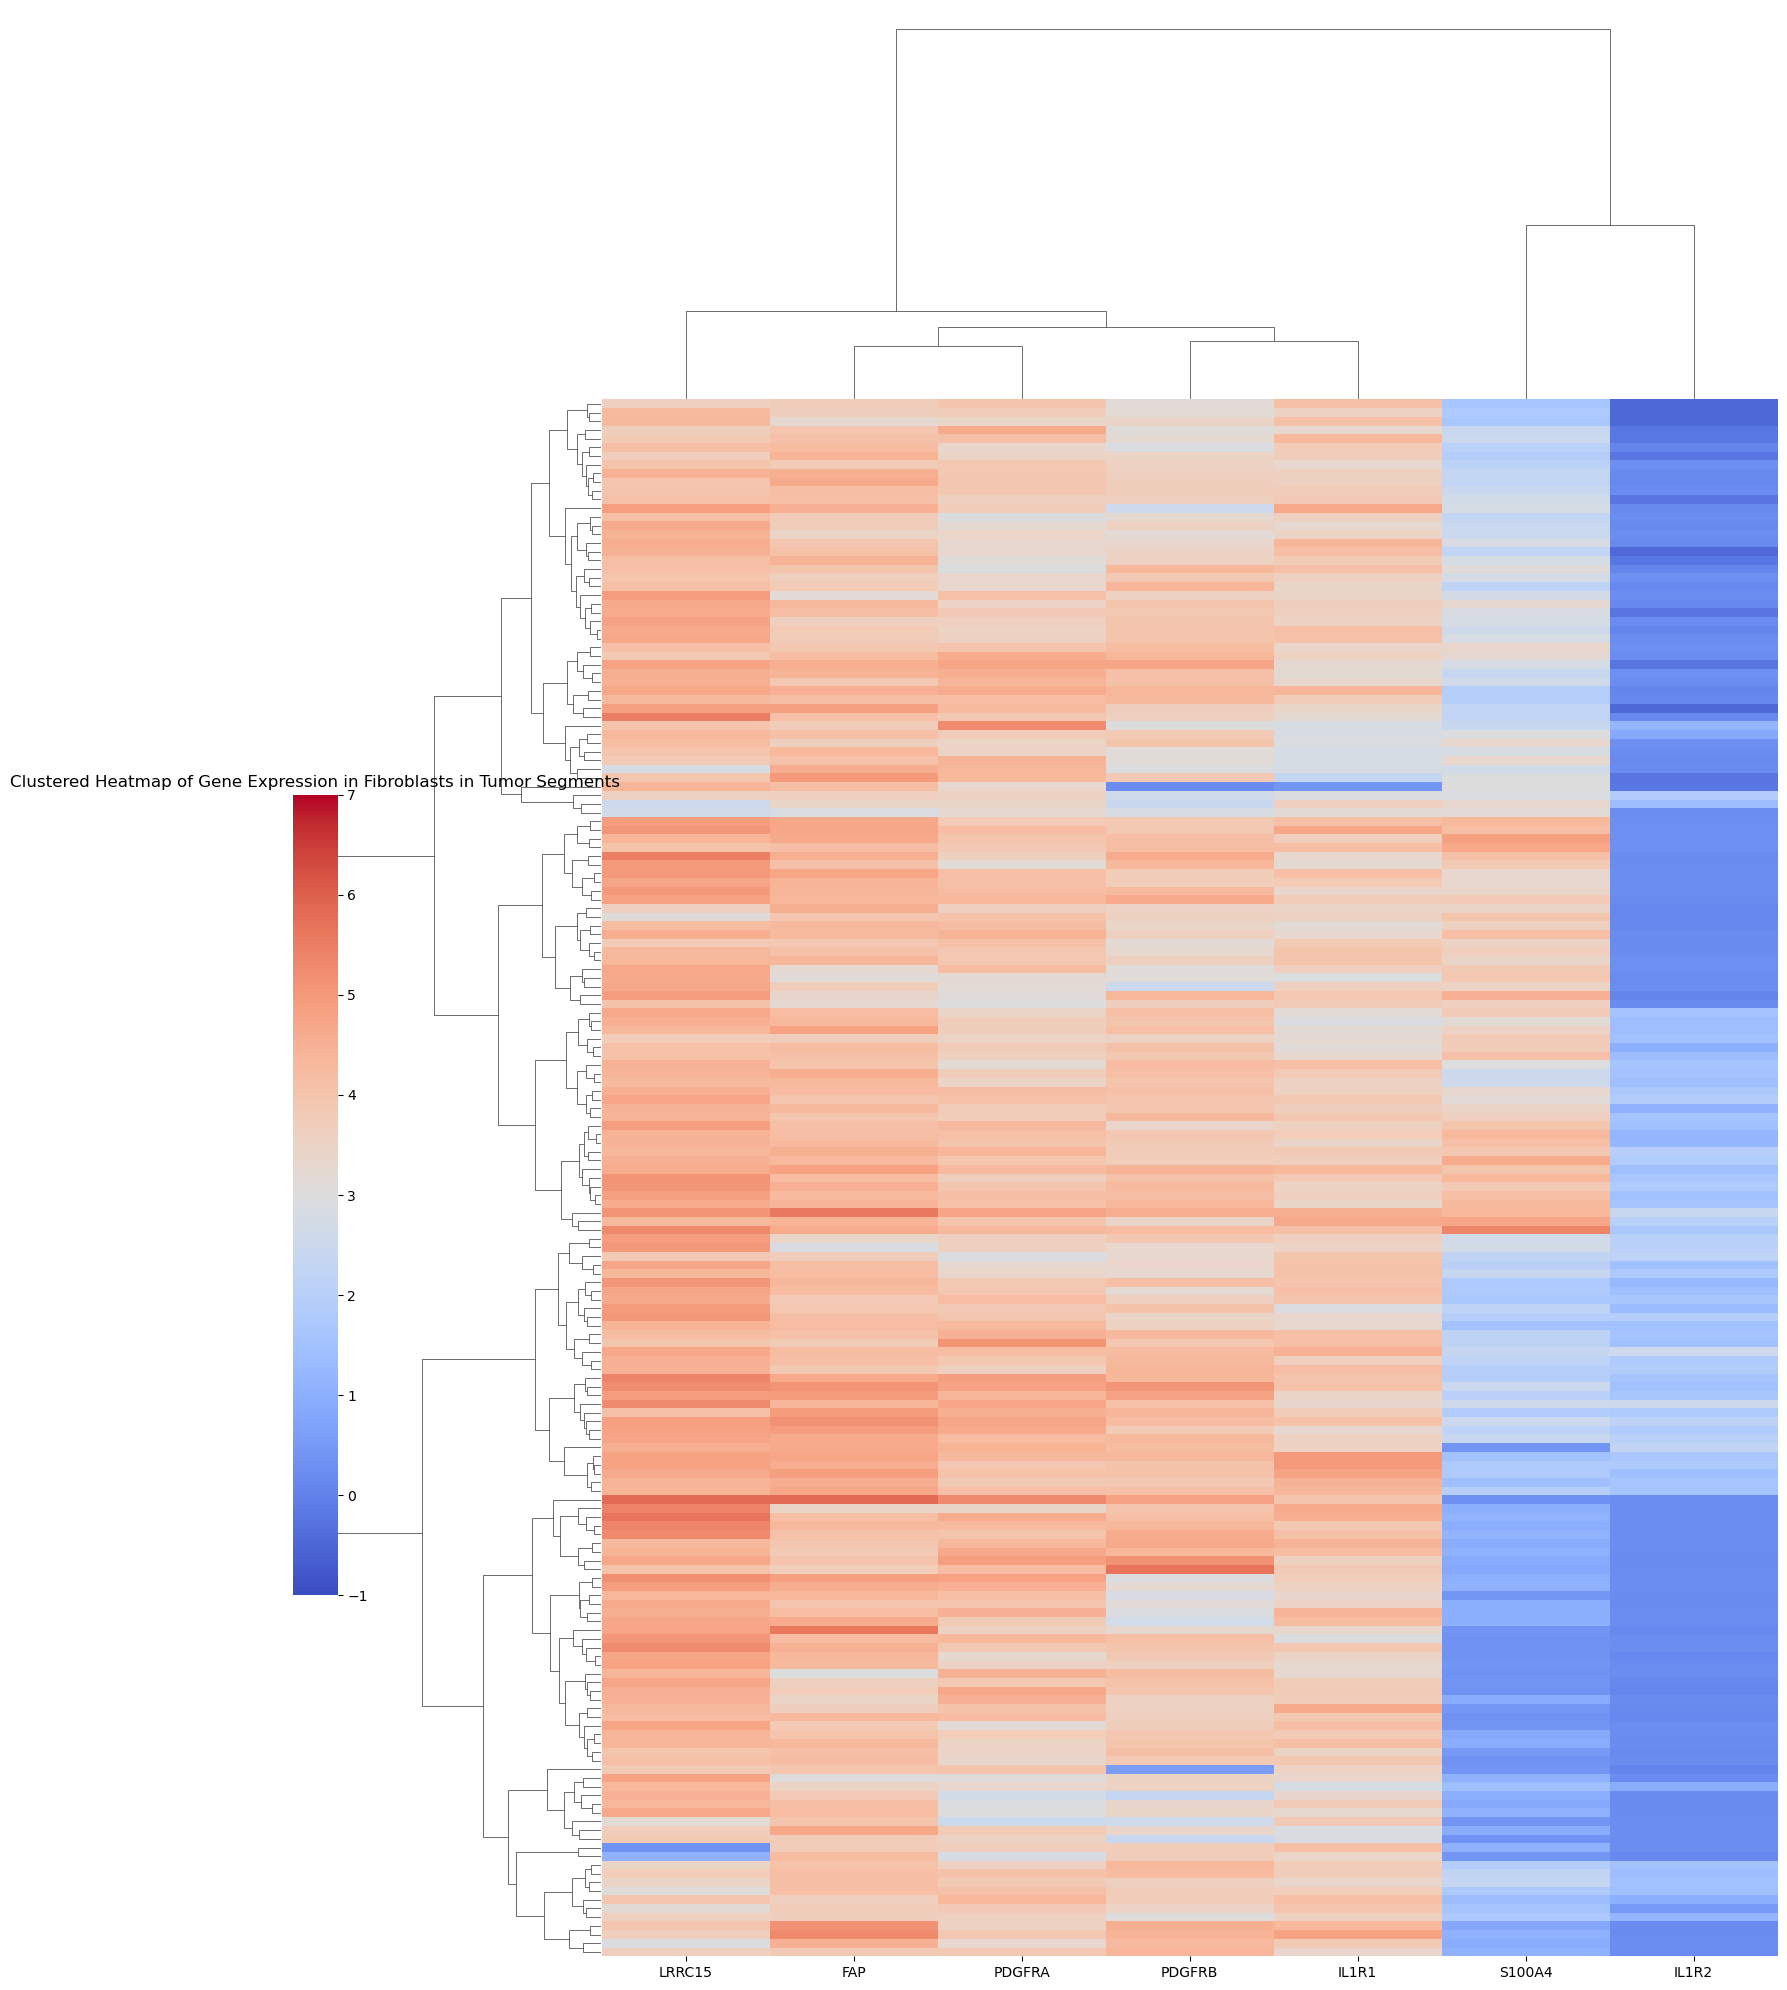

In [55]:

#lut = dict(zip(samples.values.unique(), "rbg"))
#row_colors = samples.values.map(lut)

sns.clustermap(
    tumor_fibr_expr_matrix,  # The expression matrix (samples as rows, genes as columns)
    row_linkage=tumor_sample_linkage, 
    col_linkage=tumor_gene_linkage,  # Clustering of samples,  # Clustering of genes
    cmap='coolwarm',  # Color map for heatmap
    figsize=(15, 20),  # Size of the plot
    xticklabels=target_CAF,  # Show gene names as labels on the x-axis
    yticklabels=False,  # Show sample names as labels on the y-axis
    cbar_pos=(0, .2, .03, .4),  # Color bar position adjustments
    annot=False,
    vmin=-1,
    vmax=7  # Set to True if you want to annotate each cell with the actual expression value
)

# Display the heatmap
plt.title("Clustered Heatmap of Gene Expression in Fibroblasts in Tumor Segments")
plt.show()


Hierarchial clustering for the caf derived factors and receptor genes

In [34]:
fibroblast_expr_matrix_derived = fibr_gene_expression_modified.loc[:,cafs_factors_receptors]
fibroblast_expr_matrix_derived

,TGFB1,TGFB2,TGFB3,TGFBR1,TGFBR2,TGFBR3,IL6,IL6R,IL10RA,IL10RB,...,HGF,MET,FGF1,FGF2,FGF7,FGF10,FGFR1,FGFR2,FGFR3,FGFR4
0,2.226647,3.236367,2.986907,2.876982,2.319905,2.079571,3.689826,1.722749,0.275011,-0.353014,...,4.439512,2.294546,2.345095,3.645317,4.241303,4.390142,3.704393,-0.415685,0.070217,0.263831
1,2.114127,3.40642,3.722521,2.009112,2.209143,1.982504,3.728505,1.623346,0.269413,2.067781,...,3.756217,1.437282,2.704887,3.369515,3.500114,4.3422,4.232894,-0.418627,0.068501,0.258833
2,1.598025,3.215403,3.353298,2.350904,2.046123,1.789607,3.4342,1.436117,0.282148,1.524626,...,3.981332,1.756274,2.018945,3.192874,3.651216,4.33747,4.134109,1.464091,1.442188,0.270196
3,2.273023,3.030776,4.074307,2.156268,1.971103,1.715238,3.46837,1.361617,0.281863,1.807287,...,4.192045,1.56213,2.179303,2.988996,3.996487,4.637307,4.304709,1.746667,0.072359,0.269942
4,2.354348,3.36874,3.978186,1.578572,1.785996,2.19097,3.737592,1.177512,0.281282,1.62316,...,3.943188,1.644947,2.485174,3.204471,2.650006,4.192037,3.004837,1.562368,0.072176,0.269424
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
418,2.235456,2.589519,3.899218,1.825479,2.968036,1.57395,2.964312,0.107566,-0.065949,-0.11576,...,4.299648,1.666822,2.23909,3.139466,3.548596,4.012856,3.445219,1.448439,-0.143818,-0.023271
419,2.376421,1.667566,3.467248,1.705213,2.218221,0.778599,1.901428,1.150745,0.975435,1.328913,...,2.179714,0.854061,1.486554,1.820955,1.991386,2.505945,2.608001,1.583881,0.895441,-0.024082
420,0.050405,3.167854,2.939503,0.231042,0.357815,-0.545396,3.493944,0.119967,-0.018821,-0.043765,...,2.654014,-0.028523,0.013053,2.398978,2.936411,4.378241,4.098648,2.358273,-0.051662,0.004149
421,2.041693,2.502647,3.175169,1.900028,2.34554,1.14175,1.139962,0.107593,-0.066893,1.813539,...,3.41836,1.225049,1.681518,2.223291,3.170532,3.124839,2.544148,1.898782,-0.14592,-0.02373


In [56]:
stroma_fibr_expr_matrix=fibr_gene_expression_modified.loc[fibr_gene_expression_modified["Segment"]=="stroma"]
stroma_fibr_expr_matrix=stroma_fibr_expr_matrix.loc[:,cafs_factors_receptors]
# Ensure all values are floats (if they're not already)
stroma_fibr_expr_matrix = stroma_fibr_expr_matrix.values
stroma_fibr_expr_matrix=np.array(stroma_fibr_expr_matrix)
stroma_fibr_expr_matrix= stroma_fibr_expr_matrix.astype(float)

# Compute the distance matrix for genes and samples
stroma_sample_dist = sch.distance.pdist(stroma_fibr_expr_matrix,metric='euclidean')
stroma_gene_dist = sch.distance.pdist(stroma_fibr_expr_matrix.T, metric='euclidean')

# Perform hierarchical clustering (using complete linkage)
stroma_sample_linkage = sch.linkage(stroma_sample_dist, method='ward')
stroma_gene_linkage = sch.linkage(stroma_gene_dist, method='ward')


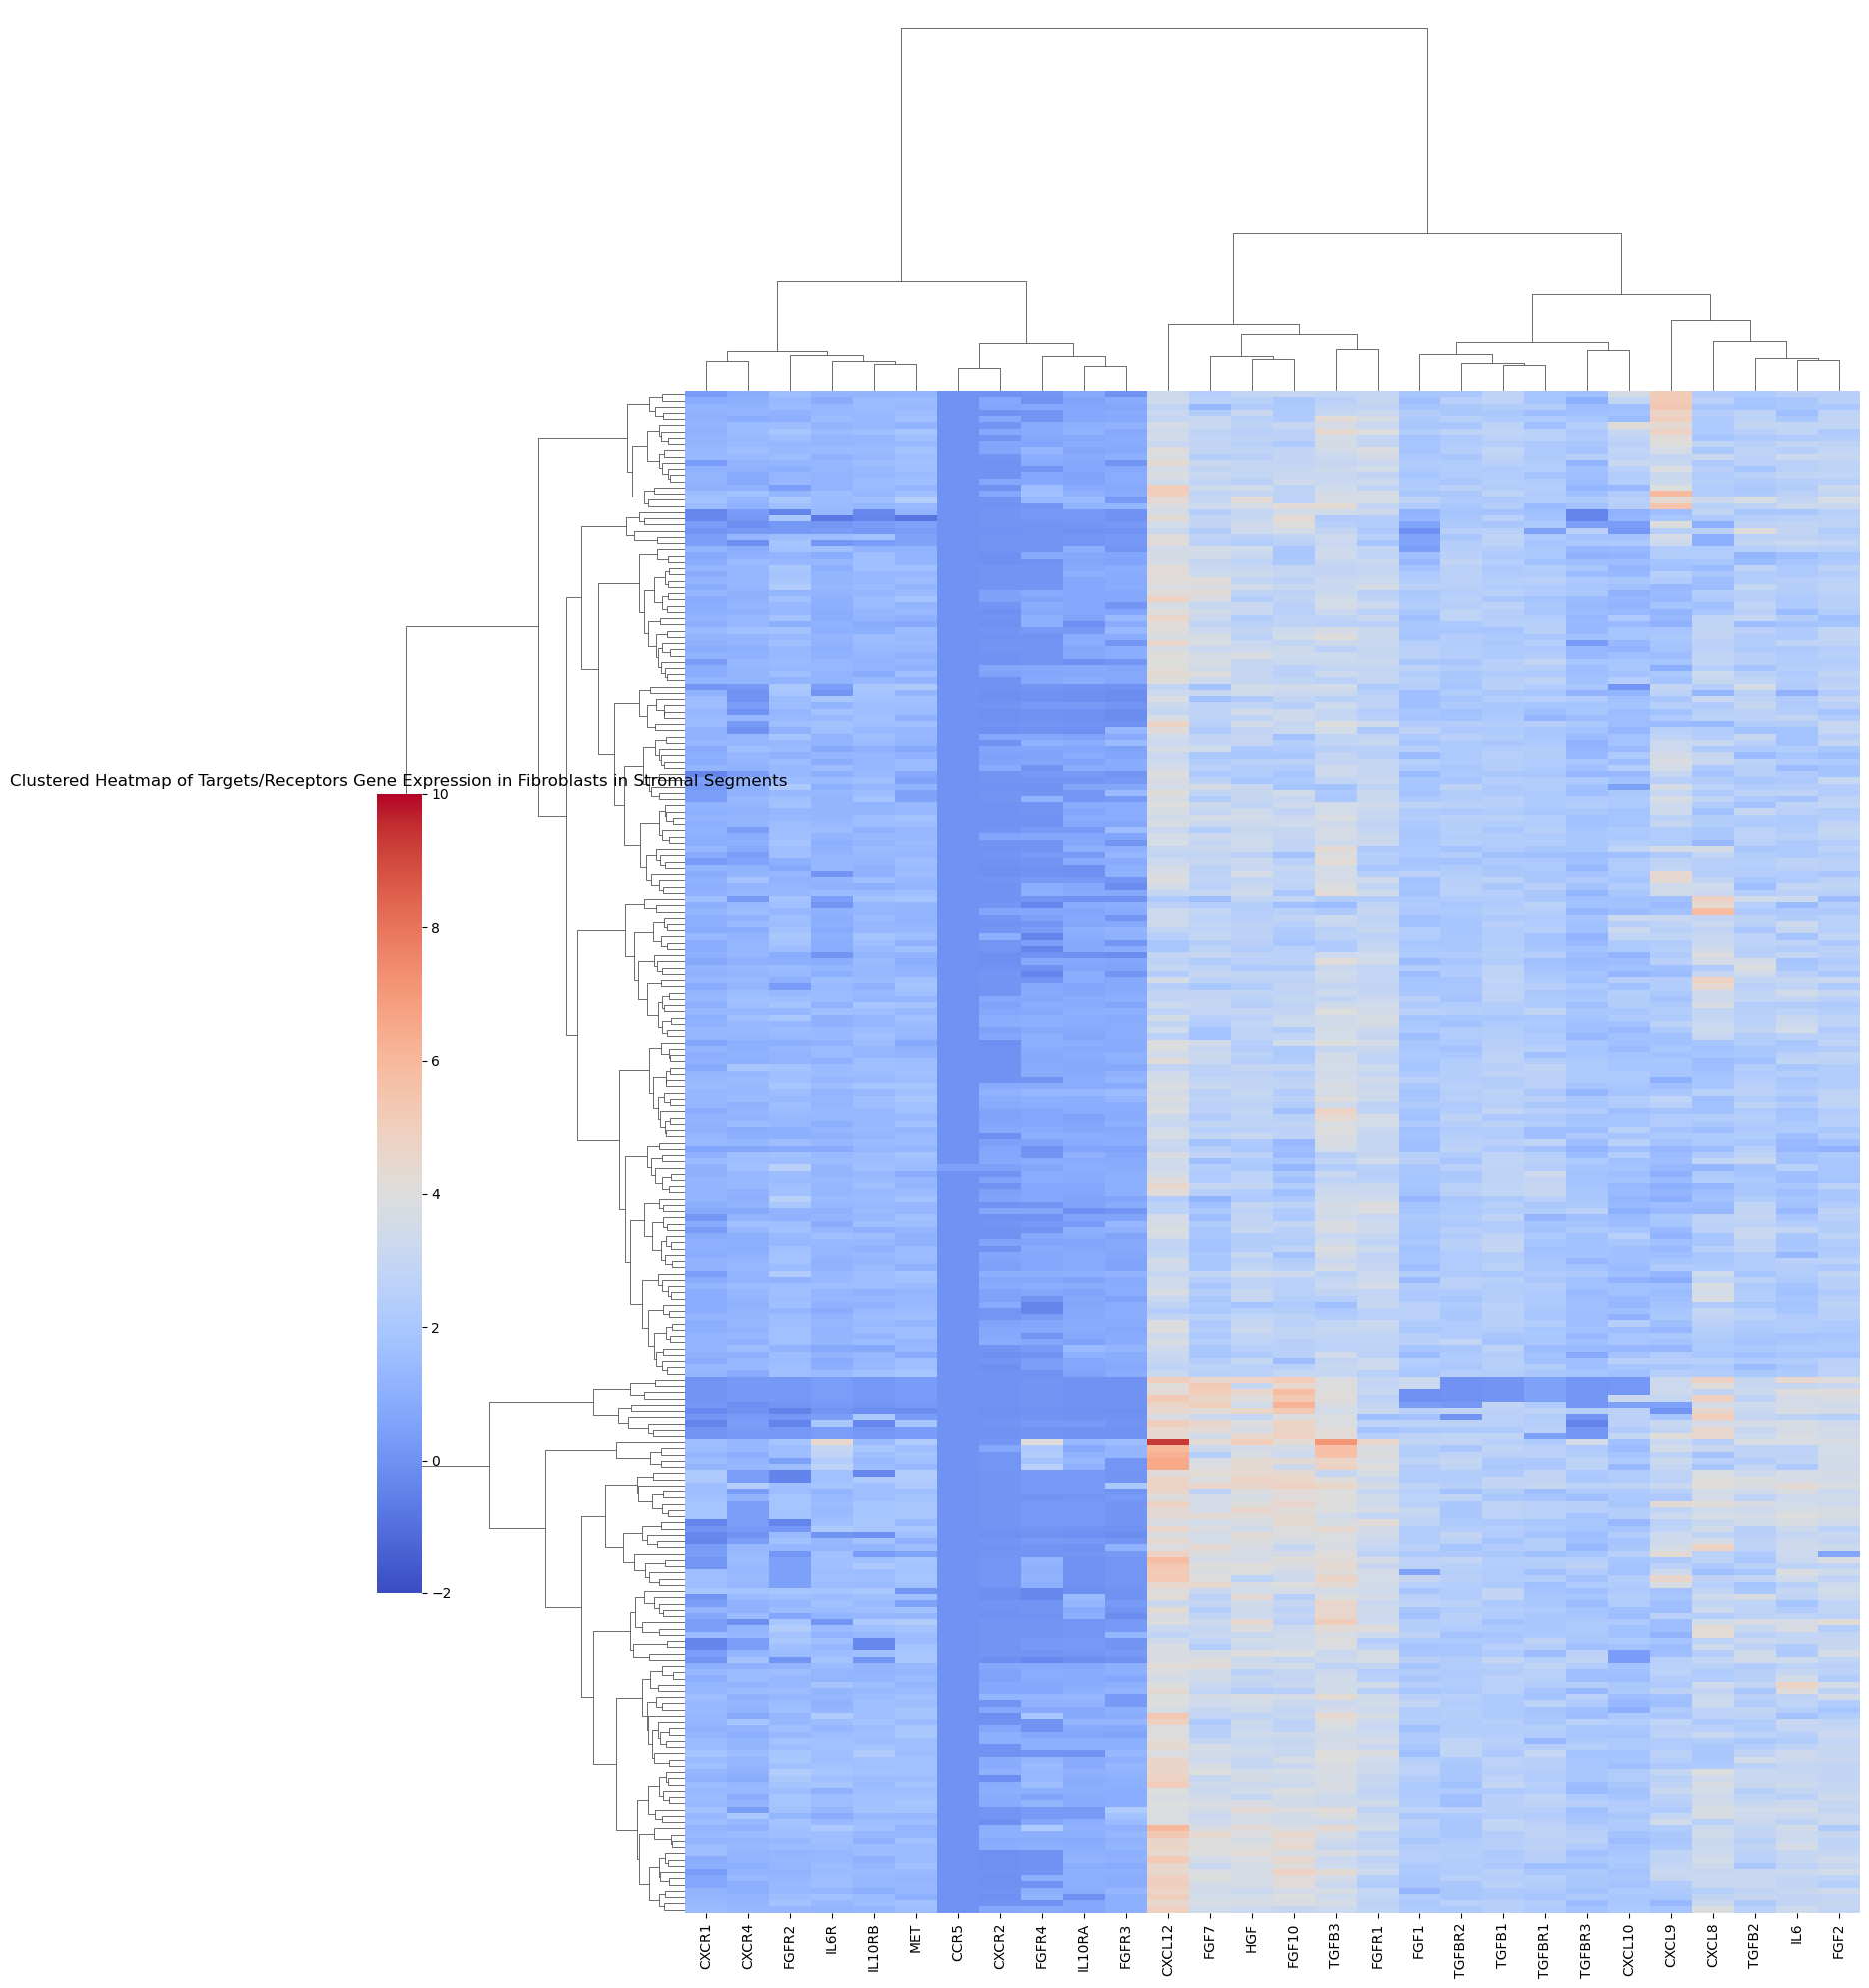

In [58]:
sns.clustermap(
    stroma_fibr_expr_matrix,  # The expression matrix (samples as rows, genes as columns)
    row_linkage=stroma_sample_linkage, 
    col_linkage=stroma_gene_linkage,  # Clustering of samples,  # Clustering of genes
    cmap='coolwarm',  # Color map for heatmap
    figsize=(15, 20),  # Size of the plot
    xticklabels=cafs_factors_receptors,  # Show gene names as labels on the x-axis
    yticklabels=False,  # Show sample names as labels on the y-axis
    cbar_pos=(0, .2, .03, .4), 
    vmin=-2, # Color bar position adjustments
    vmax=10 # Set to True if you want to annotate each cell with the actual expression value
)

# Display the heatmap
plt.title("Clustered Heatmap of Targets/Receptors Gene Expression in Fibroblasts in Stromal Segments")
plt.show()

In [59]:
# Filter for "tumor" segment
tumor_fibr_expr_matrix = fibr_gene_expression_modified.loc[fibr_gene_expression_modified["Segment"] == "tumor"]
samples=tumor_fibr_expr_matrix["Sample"]
# Select the target genes related to CAF (target_CAF)
tumor_fibr_expr_matrix = tumor_fibr_expr_matrix.loc[:, cafs_factors_receptors]

# Ensure all values are floats (if they're not already)
tumor_fibr_expr_matrix = tumor_fibr_expr_matrix.values
tumor_fibr_expr_matrix = np.array(tumor_fibr_expr_matrix)
tumor_fibr_expr_matrix = tumor_fibr_expr_matrix.astype(float)

# Compute the distance matrix for genes and samples
tumor_sample_dist = sch.distance.pdist(tumor_fibr_expr_matrix, metric='euclidean')
tumor_gene_dist = sch.distance.pdist(tumor_fibr_expr_matrix.T, metric='euclidean')

# Perform hierarchical clustering (using complete linkage)
tumor_sample_linkage = sch.linkage(tumor_sample_dist, method='ward')
tumor_gene_linkage = sch.linkage(tumor_gene_dist, method='ward')

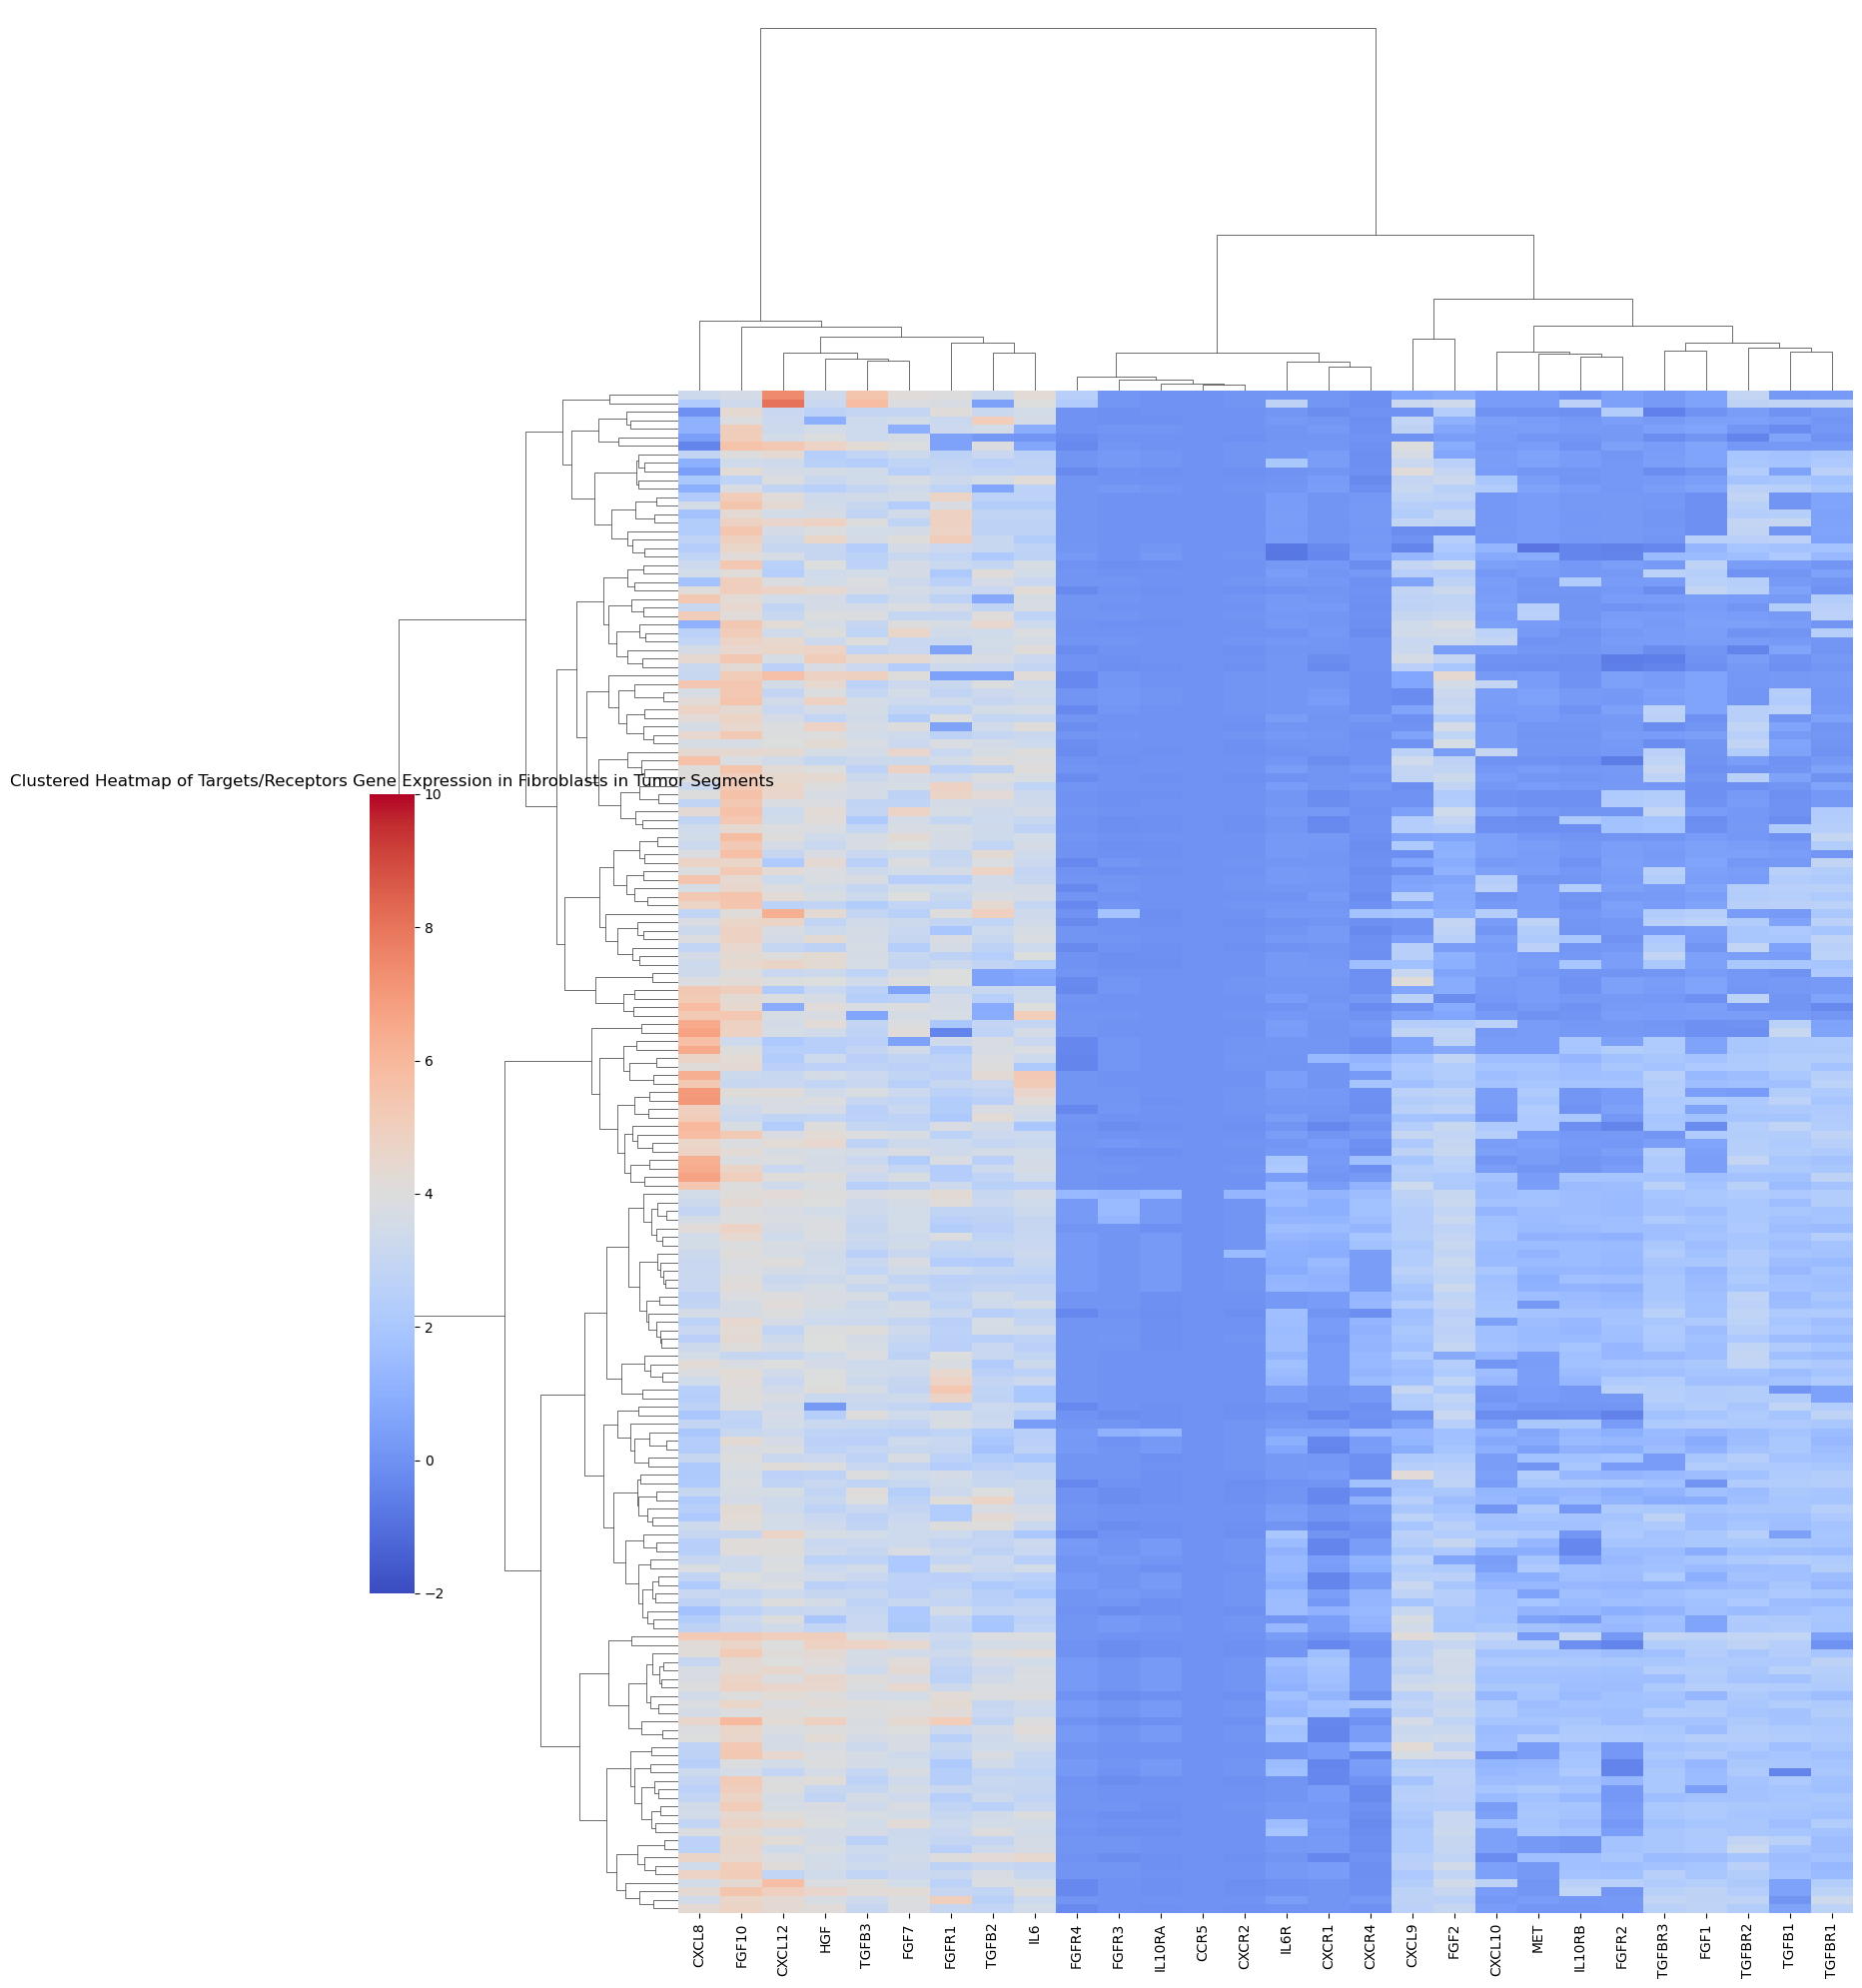

In [61]:
sns.clustermap(
    tumor_fibr_expr_matrix,  # The expression matrix (samples as rows, genes as columns)
    row_linkage=tumor_sample_linkage, 
    col_linkage=tumor_gene_linkage,  # Clustering of samples,  # Clustering of genes
    cmap='coolwarm',  # Color map for heatmap
    figsize=(15, 20),  # Size of the plot
    xticklabels=cafs_factors_receptors,  # Show gene names as labels on the x-axis
    yticklabels=False,  # Show sample names as labels on the y-axis
    cbar_pos=(0, .2, .03, .4), 
    vmin=-2, # Color bar position adjustments
    vmax=10 # Set to True if you want to annotate each cell with the actual expression value
)

# Display the heatmap
plt.title("Clustered Heatmap of Targets/Receptors Gene Expression in Fibroblasts in Tumor Segments")
plt.show()

Clustered heatmap of whole gene expression in the stromal segment

In [64]:
stromal_gene_expression=pd.read_csv("/Users/nikamikhailava/Desktop/batch_merged/batch_merged_geomx_harmony_corr_expr_transpose.csv")
stromal_gene_expression



,dcc_filename,A2M,ACADM,ACADS,ACAT1,ACVRL1,PSEN1,ADA,SGCA,ADRB2,...,RPEL1,SLC12A6,SPATA21,SYCP2L,FGF10,IL3,IL5,MBL2,ARG1,CCL7
0,DSP.1001660016606.G.A02.dcc,6.804666,3.813770,3.094522,3.164409,3.379704,4.040574,2.899794,3.971268,1.660338,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,DSP.1001660016606.G.A03.dcc,6.260479,4.098920,2.754026,3.695262,3.204526,4.713780,2.037078,3.807079,1.459433,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,DSP.1001660016606.G.A04.dcc,6.558231,3.995816,3.354820,3.765523,2.918882,3.908741,3.160093,3.933863,2.369323,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,DSP.1001660016606.G.A05.dcc,6.372312,3.182476,2.866057,3.848748,1.562825,4.439850,2.001105,4.093993,1.666247,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,DSP.1001660016606.G.A06.dcc,7.417367,3.226799,2.810282,4.366523,3.352077,3.631273,2.465758,3.329628,1.619624,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499,DSP.1001660037247.C.D02.dcc,8.166184,5.241664,3.124489,3.526732,3.990766,4.529707,2.097933,3.164388,2.191627,...,1.682951,2.486022,1.303624,4.220623,3.404106,1.639313,0.528117,1.784708,1.268932,1.171722
500,DSP.1001660037247.C.D03.dcc,6.376363,5.552360,2.214444,5.236922,3.291828,5.162804,1.452677,2.908834,0.359455,...,2.603953,1.448833,1.971167,2.171534,1.837595,0.993433,2.067794,3.294537,0.338434,0.994699
501,DSP.1001660037247.C.D04.dcc,5.965432,4.531758,3.336801,4.182140,4.394296,2.165280,3.052810,0.851340,2.393427,...,3.660318,2.696280,1.463408,2.607464,3.337978,2.273930,4.099109,1.475635,1.923790,1.826580
502,DSP.1001660037247.C.D05.dcc,4.274683,4.829125,4.450223,5.702187,2.662740,5.174575,2.488751,3.088751,0.339813,...,2.165921,2.484907,2.905090,1.682048,2.462543,2.462948,0.763774,0.365711,2.561423,0.535245


In [ ]:
metadata_merged=pd.read_csv("/Users/nikamikhailava/Desktop/batch_merged/batch_merged_geomx_metadata.csv")

In [ ]:
stromal_gene_expression.merge(fibr_gene_expression_modified[['dcc_filename', 'Segment']], on='dcc_filename', how='left')

In [63]:
# Filter for "tumor" segment
stroma_expr_matrix = stromal_gene_expression.loc[stromal_gene_expression["Segment"] == "tumor"]
samples=stroma_expr_matrix["Sample"]
# Select the target genes related to CAF (target_CAF)
stroma_expr_matrix = stroma_expr_matrix.loc[:, target_CAF]

# Ensure all values are floats (if they're not already)
stroma_expr_matrix = stroma_expr_matrix.values
stroma_expr_matrix = np.array(stroma_expr_matrix)
stroma_expr_matrix = stroma_expr_matrix.astype(float)

# Compute the distance matrix for genes and samples
stroma_sample_dist = sch.distance.pdist(stroma_expr_matrix, metric='euclidean')
stroma_gene_dist = sch.distance.pdist(stroma_expr_matrix.T, metric='euclidean')

# Perform hierarchical clustering (using complete linkage)
stroma_sample_linkage = sch.linkage(stroma_sample_dist, method='ward')
stroma_gene_linkage = sch.linkage(stroma_gene_dist, method='ward')

KeyError: 'Segment'